In [5]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Importing data
df=pd.read_csv("C:/Users/sooda/Downloads/patient_data.csv")
df.head()

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [9]:
#Data Preparation
#Handling missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   C                1825 non-null   object
 1   Age              1825 non-null   object
 2   History          1825 non-null   object
 3   Patient          1825 non-null   object
 4   TakeMedication   1825 non-null   object
 5   Severity         1825 non-null   object
 6   BreathShortness  1825 non-null   object
 7   VisualChanges    1825 non-null   object
 8   NoseBleeding     1825 non-null   object
 9   Whendiagnoused   1825 non-null   object
 10  Systolic         1825 non-null   object
 11  Diastolic        1825 non-null   object
 12  ControlledDiet   1825 non-null   object
 13  Stages           1825 non-null   object
dtypes: object(14)
memory usage: 199.7+ KB


In [11]:
#checking size of our data
df.shape

(1825, 14)

In [13]:
#checking for null values
df.isnull().sum()

C                  0
Age                0
History            0
Patient            0
TakeMedication     0
Severity           0
BreathShortness    0
VisualChanges      0
NoseBleeding       0
Whendiagnoused     0
Systolic           0
Diastolic          0
ControlledDiet     0
Stages             0
dtype: int64

In [15]:
df['Stages'].unique()

array(['HYPERTENSION (Stage-1)', 'HYPERTENSION (Stage-2)',
       'HYPERTENSIVE CRISIS', 'HYPERTENSION (Stage-2).',
       'HYPERTENSIVE CRISI', 'NORMAL'], dtype=object)

In [17]:
df["Stages"].replace({'HYPERTENSIVE CRISI': 'HYPERTENSIVE CRISIS', 'HYPERTENSION (Stage-2).' : 'HYPERTENSION (Stage-2)'}, inplace=True)

C:\Users\sooda\AppData\Local\Temp\ipykernel_8236\2768809839.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Stages"].replace({'HYPERTENSIVE CRISI': 'HYPERTENSIVE CRISIS', 'HYPERTENSION (Stage-2).' : 'HYPERTENSION (Stage-2)'}, inplace=True)


In [19]:
df['Stages'].unique()

array(['HYPERTENSION (Stage-1)', 'HYPERTENSION (Stage-2)',
       'HYPERTENSIVE CRISIS', 'NORMAL'], dtype=object)

In [23]:
#Handling categorical values
#converting categorical into numerical value
from sklearn.preprocessing import LabelEncoder

columns=["Gender","Age","Severity","History","Patient","TakeMedication","BreathShortness","VisualChanges","NoseBleeding","ControlledDiet","Whendiagnoused","Systolic","Diastolic","Stages"]
label_encoder=LabelEncoder()
for col in columns:
    df[col]=label_encoder.fit_transform(df[col])

In [21]:
df=df. rename(columns={'C': 'Gender'}) 
print(df)

      Gender    Age History Patient TakeMedication Severity BreathShortness  \
0       Male  18-34     Yes      No             No     Mild              No   
1     Female  18-34     Yes      No             No     Mild              No   
2       Male  35-50     Yes      No             No     Mild              No   
3     Female  35-50     Yes      No             No     Mild              No   
4       Male  51-64     Yes      No             No     Mild              No   
...      ...    ...     ...     ...            ...      ...             ...   
1820  Female  35-50     Yes      No             No    Sever              No   
1821    Male  51-64     Yes      No             No    Sever              No   
1822  Female  51-64     Yes      No             No    Sever              No   
1823    Male    65+     Yes      No             No    Sever              No   
1824  Female    65+     Yes      No             No    Sever              No   

     VisualChanges NoseBleeding Whendiagnoused   Sy

In [25]:
#Exploratory Data Analysis
df.describe()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,0.499726,1.441096,0.907945,0.460822,0.921096,1.013151,0.465205,0.484932,1.026849,1.026301,1.965479,2.717808,0.460822,1.145205
std,0.500137,1.098723,0.289183,0.498599,0.854759,0.786287,0.498925,0.499910,0.678493,0.810680,1.158215,1.256490,0.498599,1.096876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000
75%,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,4.000000,4.000000,1.000000,3.000000


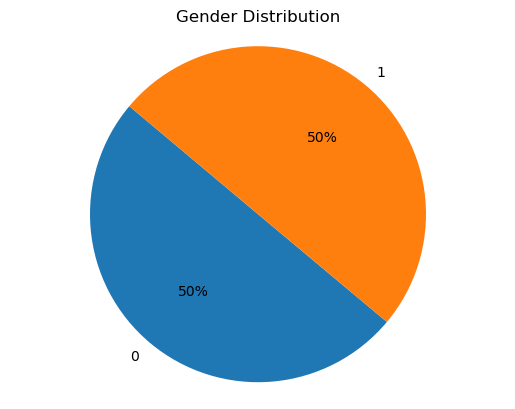

In [27]:
#Univariate Analysis
gender_counts=df["Gender"].value_counts()

#Plotting the pie chart
plt.pie(gender_counts, labels=gender_counts.index, startangle=140, autopct="%1.0f%%")
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()

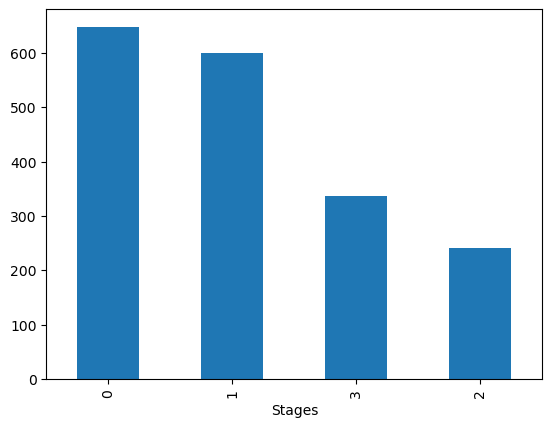

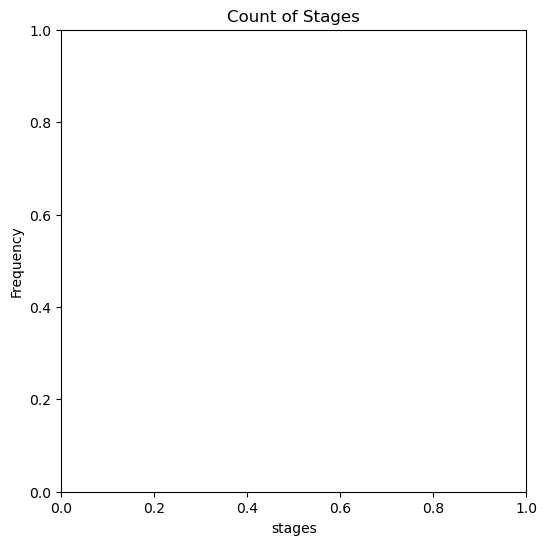

In [29]:
frequency=df["Stages"].value_counts()
frequency.plot(kind="bar")
plt.figure(figsize=(6,6))
plt.xlabel("stages")
plt.ylabel("Frequency")
plt.title("Count of Stages")
plt.show()

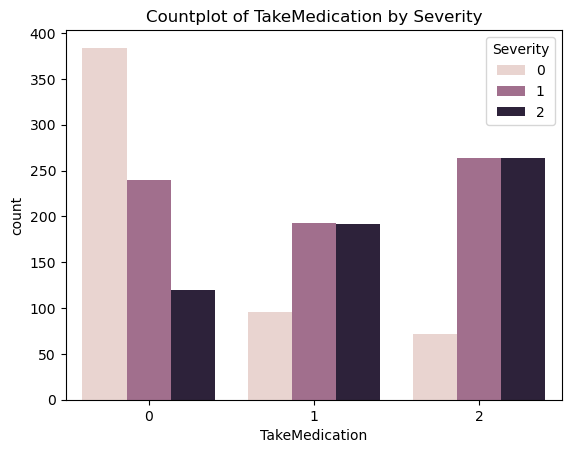

In [31]:
#bivariate analysis
sns.countplot(x="TakeMedication",hue="Severity",data=df)
plt.title("Countplot of TakeMedication by Severity")
plt.show()

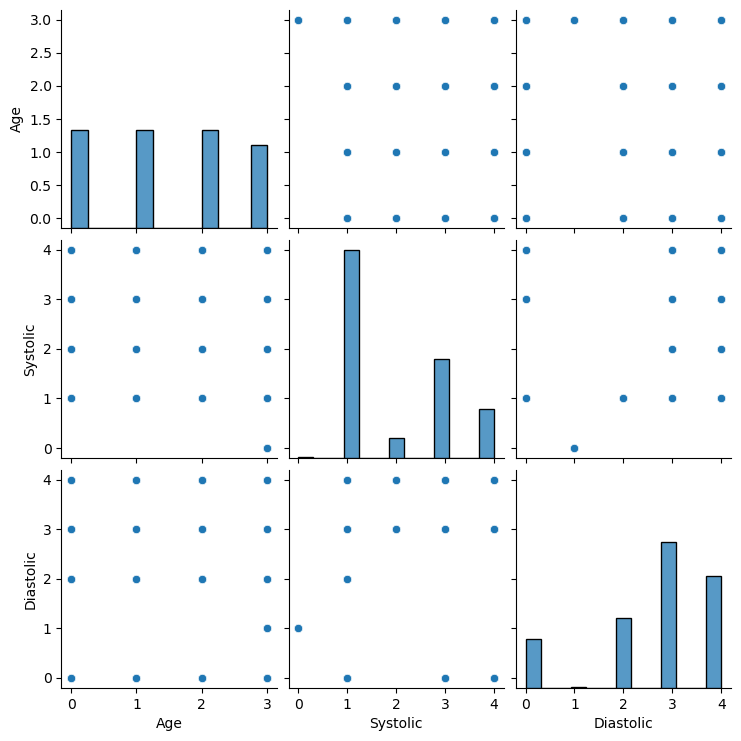

In [33]:
#Multivariate Analysis
sns.pairplot(data=df, vars=["Age","Systolic","Diastolic"])
plt.show()

In [35]:
#Splitting data into X and Y
x=df.drop("Stages",axis=1)
x

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet
0,1,0,1,0,0,0,0,0,1,1,1,3,0
1,0,0,1,0,0,0,0,0,1,1,1,3,0
2,1,1,1,0,0,0,0,0,1,1,1,3,0
3,0,1,1,0,0,0,0,0,1,1,1,3,0
4,1,2,1,0,0,0,0,0,1,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0,1,1,0,0,2,0,0,1,2,1,2,0
1821,1,2,1,0,0,2,0,0,1,2,1,2,0
1822,0,2,1,0,0,2,0,0,1,2,1,2,0
1823,1,3,1,0,0,2,0,0,1,2,1,2,0


In [37]:
y=df["Stages"]
y

0       0
1       0
2       0
3       0
4       0
       ..
1820    3
1821    3
1822    3
1823    3
1824    3
Name: Stages, Length: 1825, dtype: int32

In [39]:
#splitting into training and testing datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=30)

In [41]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred)
c_lr = classification_report(y_test, y_pred)

print('Accuracy Score: ', acc_lr)
print(c_lr)


Accuracy Score:  0.9808219178082191
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       132
           1       1.00      1.00      1.00       133
           2       1.00      1.00      1.00        34
           3       0.90      1.00      0.95        66

    accuracy                           0.98       365
   macro avg       0.98      0.99      0.98       365
weighted avg       0.98      0.98      0.98       365



C:\Users\sooda\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

acc_rf = accuracy_score(y_test, y_pred)
c_rf = classification_report(y_test, y_pred)

print('Accuracy Score: ', acc_rf)
print(c_rf)


Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       133
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        66

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



In [45]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
y_pred = decision_tree_model.predict(x_test)

acc_dt = accuracy_score(y_test, y_pred)
c_dt = classification_report(y_test, y_pred)

print('Accuracy Score: ', acc_dt)
print(c_dt)


Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       133
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        66

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



In [47]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

NB = GaussianNB()
NB.fit(x_train, y_train)
y_pred = NB.predict(x_test)

acc_nb = accuracy_score(y_test, y_pred)
c_nb = classification_report(y_test, y_pred)

print('Accuracy Score: ', acc_nb)
print(c_nb)


Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       133
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        66

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



In [49]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

mNB = MultinomialNB()
mNB.fit(x_train, y_train)
y_pred = NB.predict(x_test)

acc_mnb = accuracy_score(y_test, y_pred)
c_mnb = classification_report(y_test, y_pred)

print('Accuracy Score: ', acc_mnb)
print(c_mnb)


Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       133
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        66

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



In [51]:
#Testing the model
prediction = random_forest.predict([[0, 3, 0, 2, 0, 0, 1, 6, 0.0, 0.0, 0.0, 0,0]])
print("Random Forest Prediction",prediction[0])


Random Forest Prediction 2


C:\Users\sooda\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [53]:
prediction = logistic_regression.predict([[0, 3, 0, 2, 0, 0, 1, 6, 0.0, 0.0, 0.0, 0,0]])
print("Logistic Regression Prediction:", prediction[0])


Logistic Regression Prediction: 2


C:\Users\sooda\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [55]:
prediction = decision_tree_model.predict([[0, 3, 0, 2, 0, 0, 1, 6, 0.0, 0.0, 0.0, 0,0]])
print("Decision Tree Prediction:", prediction[0])


Decision Tree Prediction: 0


C:\Users\sooda\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [57]:
prediction = NB.predict([[0, 3, 0, 2, 0, 0, 1, 6, 0.0, 0.0, 0.0, 0,0]])
print("GaussianNB Prediction:", prediction[0])


GaussianNB Prediction: 0


C:\Users\sooda\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [59]:
prediction = mNB.predict([[0, 3, 0, 2, 0, 0, 1, 6, 0.0, 0.0, 0.0, 0,0]])
print("MultinomialNB Prediction:", prediction[0])


MultinomialNB Prediction: 2


C:\Users\sooda\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [61]:
model = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree Classifier', 'RandomForest Classifier',
              'Gaussian Navie Bayes', 'Multinomial Navie Bayes'],
    'Score': [acc_lr, acc_dt, acc_rf, acc_nb, acc_mnb],
})

model


,Model,Score
0,Linear Regression,0.980822
1,Decision Tree Classifier,1.000000
2,RandomForest Classifier,1.000000
3,Gaussian Navie Bayes,1.000000
4,Multinomial Navie Bayes,1.000000


In [63]:
import pickle
import warnings
pickle.dump(random_forest,open("predictive_pulse_model.pkl","wb"))